In [119]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [120]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [121]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [122]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [123]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [124]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [125]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [127]:
# Find the most recent date in the data set.
newest = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(newest.date)

2017-08-23


Query Date:  2016-08-23


ConversionError: Failed to convert value(s) to axis units: ['2016-08-24', '2017-05-30', '2017-03-06', '2017-01-25', '2017-02-16', '2017-03-26', '2017-01-09', '2016-10-28', '2017-08-17']

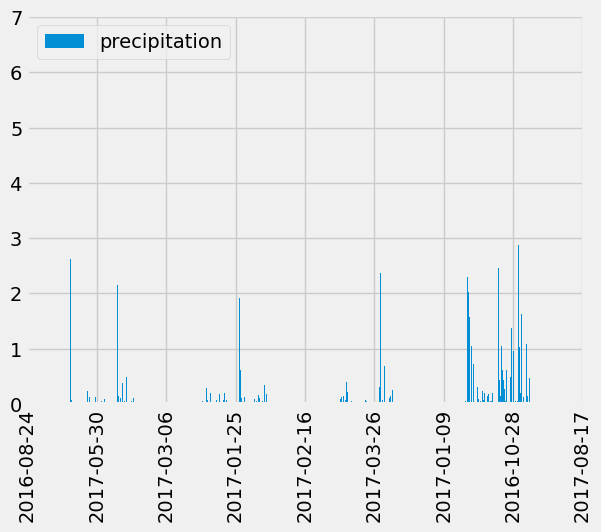

In [150]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Import a new date time module to extract data past weeks span
# as dt.timedelta only works for smaller ranges of time
from dateutil.relativedelta import relativedelta

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - relativedelta(months=12)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
unique_precip_data = session.query(Measurement).filter(Measurement.date > '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame([{'date' : x.date, 'precipitation':x.prcp} for x in unique_precip_data])
precipitation_df.head()

# Sort the dataframe by date
precipitation_df.sort_values(by = 'date' ,ascending = True )

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot.bar()
#precipitation_df.set_index('date', inplace=True)
indices = range(0, len(precipitation_df['date']), len(precipitation_df['date']) // 8)

# Get the corresponding dates based on the indices
selected_dates = [precipitation_df['date'][i] for i in indices]

# Set the x-axis tick positions and labels
plt.xticks(indices, selected_dates)
plt.xticks(selected_dates)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [144]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(total_stations)

9


In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
qu = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for x in qu:
   print(x.station, x[1])

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min_temp = session.query(func.min(Measurement.tobs)).filter_by(station='USC00519281').scalar()
max_temp = session.query(func.max(Measurement.tobs)).filter_by(station='USC00519281').scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station='USC00519281').scalar()

print(f"Minimum temperature: {min_temp}")
print(f"Maximum temperature: {max_temp}")
print(f"Average temperature: {avg_temp}")


Minimum temperature: 54.0
Maximum temperature: 85.0
Average temperature: 71.66378066378067


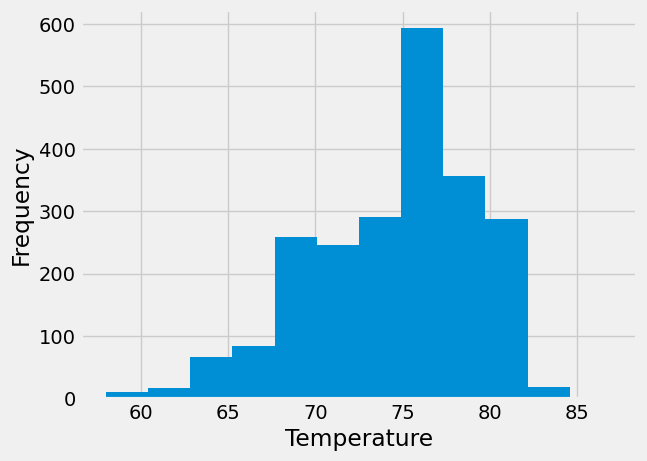

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Since we already gathered info regarding the most recent date value in the csv file in the 'newest'
# query, we can naturally deduce that we need the last 12 months from 2017-08-23, which would be until 
# 2016-08-23
newquery = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc())

# Grab the histogram x-values inside a new list
temperatures = [x[0] for x in newquery]

plt.hist(temperatures, bins=12)  
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()